Input: 
- road segments (to be decided how big, probably multiple bridges per segments)
- Traffic density per type of transport (3, decided in Simio) per segment
- Broken bridges per segment
- Average travel time in segment per type of transport

Output:
- stacked graph of traffic density
- heatmap of traffic density --> perhaps better to take average travel time??
- broken bridges per segment (include type only in table, not graph)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0
  'bottom=%s, top=%s') % (bottom, top))


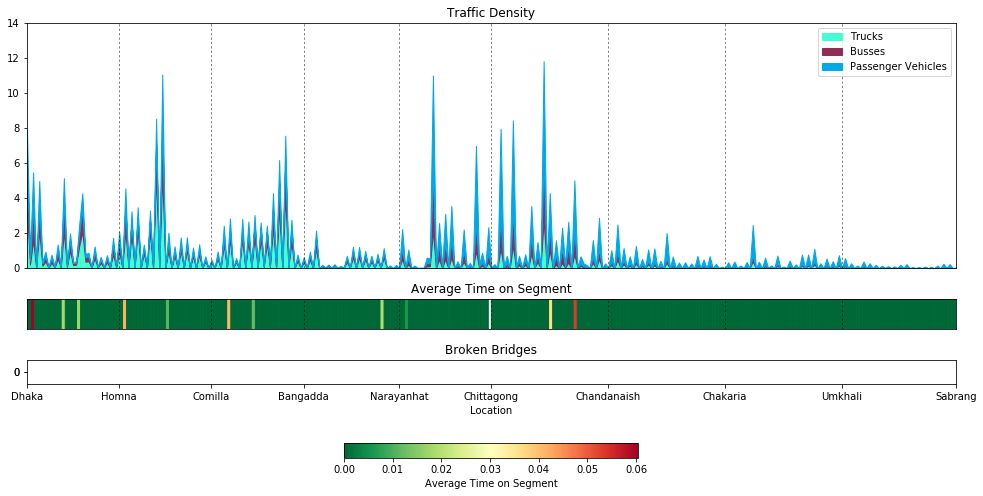

In [1]:
# import packages
from Visualisation import plot_traffic_density
from MySQL import Database
import datetime, threading, time

%matplotlib inline

# Depending on the choices made by the user, select the right csv file and data
db = Database('127.0.0.1', 'Discrete', 'epa1351user', 'qwertyu1234')
db.connect()

seconds = 5
next_call = time.time()
frame = -1

def update():
    global next_call, seconds, frame
    next_call += seconds
    
    latest = db.latestTime()
    
    if latest > frame:
        frame = latest
        plot_traffic_density(db.dataPerSegment(frame))
    
    threading.Timer(next_call - time.time(), update).start()

plot_traffic_density(db.dataPerSegment(4))